Relax Take Home Challenge

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import re



### Load Data

In [3]:
# Users data
users=pd.read_csv('/content/drive/MyDrive/1481069814_relax_challenge/relax_challenge/takehome_users.csv',encoding='latin-1')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# Engagement data
engagement=pd.read_csv('/content/drive/MyDrive/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv')

engagement.info()
engagement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### Adopted Users
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period

In [5]:
engagement['time_stamp']=pd.to_datetime(engagement['time_stamp'])
engagement.info()
engagement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
def three_in_seven(df, days=7, logins=3):
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    elapsed_days = df['date'].diff(periods=logins-1)
    return any(elapsed_days <= timedelta(days=days))

In [7]:
adopted_user = engagement.groupby('user_id').apply(three_in_seven)
adopted_user.head()


<ipython-input-7-b2e1c6b0ef5d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adopted_user = engagement.groupby('user_id').apply(three_in_seven)


,0
user_id,
1,False
2,True
3,False
4,False
5,False


In [8]:
adopted_df = pd.DataFrame(adopted_user)
adopted_df.reset_index(inplace=True)
adopted_df = adopted_df.rename(columns = {0:'adopted'})
adopted_df.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [9]:
data = pd.merge(left=users, right=adopted_df,  how='inner', left_on='object_id',right_on='user_id')
data=data.drop(columns="user_id")

data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  adopted                     8823 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 698.0+ KB


# EDA



In [11]:
adopted_true= data[data['adopted']==True]

print(len(adopted_true)/len(data))

0.18769126147568854


<Axes: xlabel='adopted', ylabel='count'>

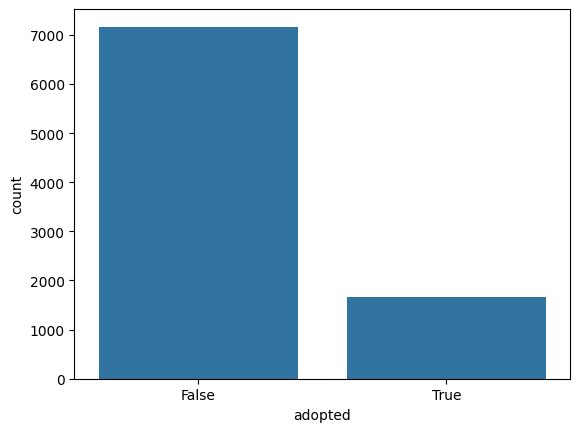

In [12]:
sns.countplot(x ='adopted', data = data)


<Axes: xlabel='creation_source', ylabel='count'>

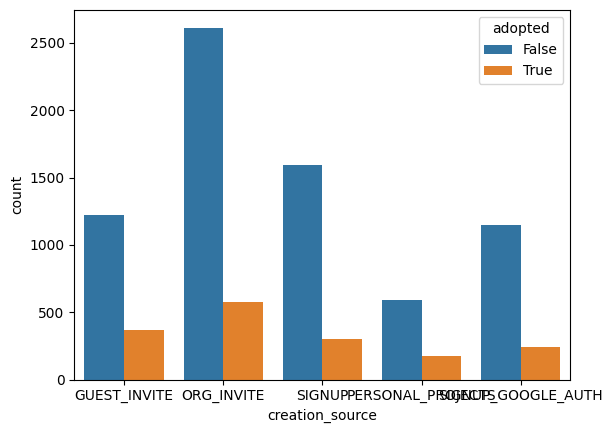

In [13]:
sns.countplot(x ='creation_source', data = data, hue='adopted')


<Axes: xlabel='opted_in_to_mailing_list', ylabel='count'>

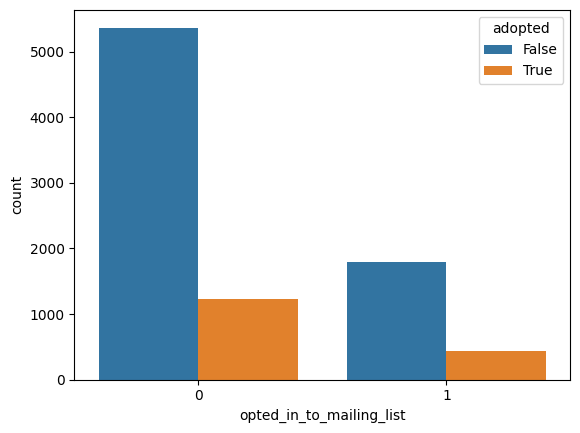

In [14]:
sns.countplot(x ='opted_in_to_mailing_list', data = data, hue='adopted')


<Axes: xlabel='enabled_for_marketing_drip', ylabel='count'>

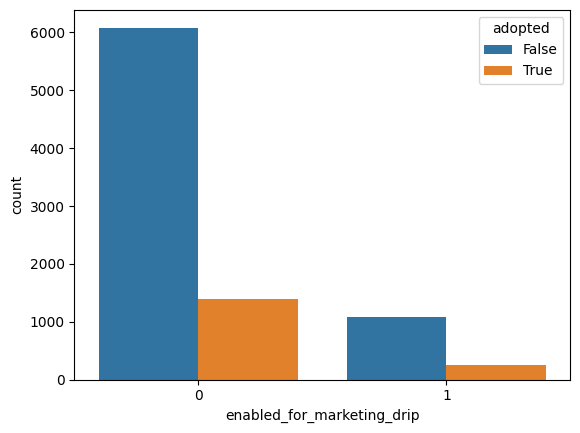

In [15]:
sns.countplot(x ='enabled_for_marketing_drip', data = data, hue='adopted')

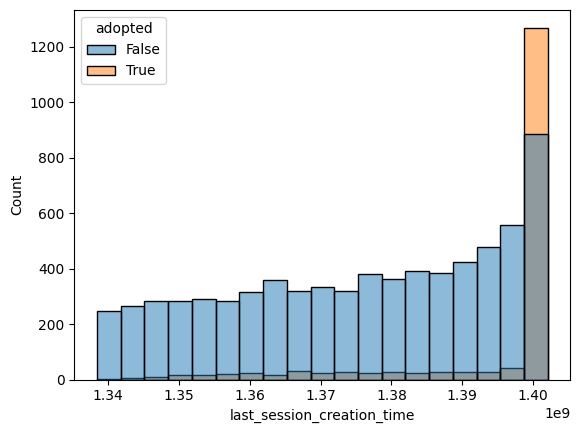

In [16]:
sns.histplot(x ='last_session_creation_time', data = data, hue='adopted')
sns.set(rc = {'figure.figsize':(12,6)})


<Axes: xlabel='creation_source', ylabel='last_session_creation_time'>

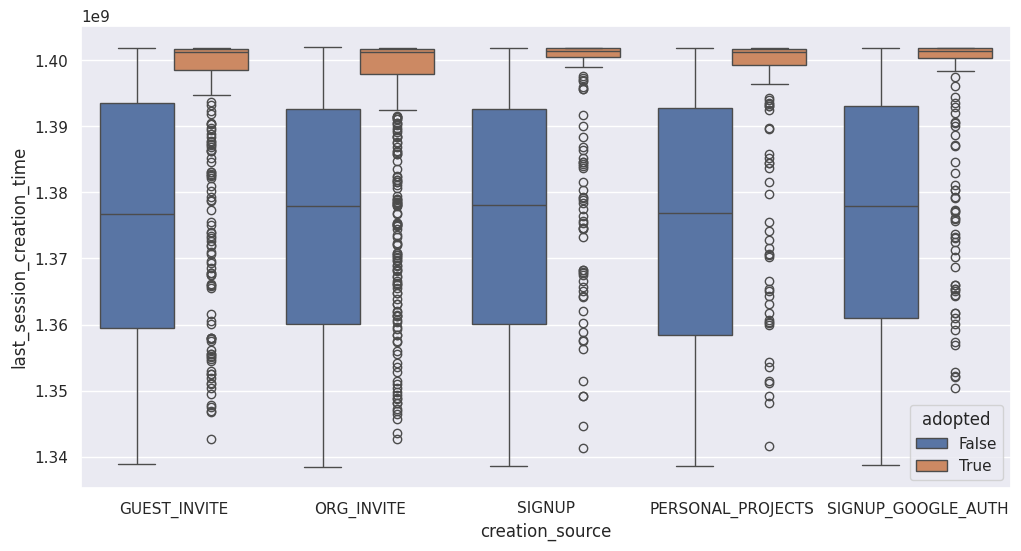

In [17]:
sns.boxplot(y="last_session_creation_time",x='creation_source', data=data, hue="adopted")


We can observe that our adopted users consist of 13% of total users.
Users with personal projects are more likely for future adoption
Last session creation time seems to be very important for determining adoption over a seven day period of at least 3 visits. A majority were adopted ~1.4.

In [18]:
data_prep=data
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  adopted                     8823 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 698.0+ KB


In [20]:
trips_processing=pd.get_dummies(data_prep, columns=['creation_source'], drop_first=True)

trips_processing=trips_processing.drop(columns=['name', 'creation_time','object_id','email', 'invited_by_user_id'])

trips_processing.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,False,False,False,False,False
1,1.396238e+09,0,0,1,True,True,False,False,False
2,1.363735e+09,0,0,94,False,True,False,False,False
3,1.369210e+09,0,0,1,False,False,False,False,False
4,1.358850e+09,0,0,193,False,False,False,False,False


In [21]:
y = trips_processing['adopted']
X = trips_processing.drop('adopted', axis=1)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=125)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

params = {'n_estimators': [10, 25, 50, 150]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Optimum parameters were', model.best_params_)
print('Best model precision', model.best_score_)

Optimum parameters were {'n_estimators': 150}
Best model precision 0.8784942442905326


In [22]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

model = RandomForestClassifier(
    random_state=125, class_weight='balanced', n_estimators=50
)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy of test set was 0.8844061650045331
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      1792
        True       0.73      0.61      0.67       414

    accuracy                           0.88      2206
   macro avg       0.82      0.78      0.80      2206
weighted avg       0.88      0.88      0.88      2206



In [23]:
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[1697   95]
 [ 160  254]]


In [24]:
# Calculate feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print(importance)

last_session_creation_time            0.711637
org_id                                0.250632
opted_in_to_mailing_list              0.008012
enabled_for_marketing_drip            0.007272
creation_source_ORG_INVITE            0.006598
creation_source_SIGNUP                0.006515
creation_source_SIGNUP_GOOGLE_AUTH    0.004925
creation_source_PERSONAL_PROJECTS     0.004407
dtype: float64


## Conclusions

The RF model produced an accuracry score of 88.6% which is good in the sense that the model correctly predicted an adopted user 73% of the time. The most important features are observed to be last session creation time and org_id.

The recommendation is to aim at recent users and provide user support.